# Visualizing FordGoBike Data


### Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#prelim)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)
- [Sources](#sources)

In [4]:
from IPython.display import Image 
Image(url = 'https://c1cleantechnicacom-wpengine.netdna-ssl.com/files/2016/10/Ford-GoBike_MTVweb.jpg')

<a id='intro'></a>
## Introduction

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> See the data [here](https://www.fordgobike.com/system-data)

<a id='prelim'></a>
## Preliminary Wrangling

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import datetime

> Loading in the dataset

I saved the csv files from the [FordGoBike website](https://www.fordgobike.com/system-data) in one location on my computer

In [120]:
df = pd.read_csv('fordgo_master.csv')

In [121]:
# Showing the first five rows of the newly combined dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [95]:
# Sampling the data helps the analyst understand the required cleaning needed, and get a feel for the data
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
68650,462,2017-12-06 09:43:20.0130,2017-12-06 09:51:02.7280,96,Dolores St at 15th St,37.766210,-122.426614,58,Market St at 10th St,37.776619,-122.417385,1302,Customer,1988.0,Male
233213,592,2017-10-17 18:15:46.1130,2017-10-17 18:25:38.9680,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2996,Subscriber,1980.0,Male
237194,315,2017-10-16 18:31:59.3110,2017-10-16 18:37:15.2030,96,Dolores St at 15th St,37.766210,-122.426614,119,18th St at Noe St,37.761047,-122.432642,2314,Subscriber,1995.0,Male
458489,731,2017-08-07 13:02:38.9230,2017-08-07 13:14:50.3140,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,16,Steuart St at Market St,37.794130,-122.394430,2598,Customer,NaN,NaN
151365,596,2017-11-09 11:04:44.1300,2017-11-09 11:14:40.9250,41,Golden Gate Ave at Polk St,37.781270,-122.418740,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,2015,Customer,NaN,NaN
15490,1076,2017-12-21 15:58:26.3880,2017-12-21 16:16:22.4470,19,Post St at Kearny St,37.788975,-122.403452,55,Webster St at Grove St,37.777053,-122.429558,3375,Customer,NaN,NaN
286656,436,2017-10-02 15:41:37.1120,2017-10-02 15:48:53.7550,25,Howard St at 2nd St,37.787522,-122.397405,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1138,Customer,1993.0,Female
451439,1094,2017-08-10 07:09:48.3640,2017-08-10 07:28:02.8380,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,13,Commercial St at Montgomery St,37.794231,-122.402923,2522,Subscriber,1989.0,Female
21457,308,2017-12-19 18:30:19.0000,2017-12-19 18:35:27.3400,282,Market St at Park St,37.332426,-121.890349,310,San Fernando St at 4th St,37.335885,-121.885660,127,Subscriber,1968.0,Male
407266,158,2017-08-26 10:26:51.1640,2017-08-26 10:29:29.3730,96,Dolores St at 15th St,37.766210,-122.426614,120,Mission Dolores Park,37.761420,-122.426435,373,Subscriber,1977.0,Male


In [96]:
# Let's take a peak into the data's basic information
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [97]:
df.shape

(519700, 15)

In [98]:
# Let's also get some additional description for stats figures
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [99]:
# Any duplicates?
df.duplicated().sum()
# No duplicates here - that was straightforward

0

In [100]:
# What about NaN values?
df.isna().sum()
# It looks like some of the starting and ending values are NaN, along with member birth years and genders

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

### Cleaning

Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned (from left to right):
- There are missing values throughout the dataset (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
- Start/end times are not in the timestamp format
- The following columns are not in object format: 
  - start_station_id
  - end_station_id
  - bike_id
- Member birth is in the float format, but should be converted to integer format
- Member birthdates have a few inaccurate values

In [101]:
# Save the original data set and save as a new, cleaned version while I clean things up
df_cleaned = df.copy()

##### Define: Missing values - I will hold on cleaning these up until later. It may or may not present an issue. 
##### Code: N/A
##### Test: N/A

##### Define: Converting several of the columns to the appropriate data type:
- Starting and ending times to the timestamp format
- User type, gender, and bike share for all to category format
- Bike ID, start station ID, and end station ID to object format

##### Code: see below

In [102]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [103]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')
df_cleaned.bike_share_for_all_trip = df_cleaned.bike_share_for_all_trip.astype('category')

AttributeError: 'DataFrame' object has no attribute 'bike_share_for_all_trip'

In [ ]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

##### Test: 

In [ ]:
df_cleaned.info(null_counts = True)

##### Define: Calculate the age of each member by subtracting their birth year from the current year (2019) and then clean up the format of the member age and birth year to integer
##### Code: see below

In [ ]:
# Subtracting the member_birth_year from the current year to get the ages of the members
df_cleaned['member_age'] = 2019 - df_cleaned['member_birth_year']

##### Test: 

In [ ]:
df_cleaned.head()

In [ ]:
df_cleaned.info(null_counts = True)

##### Define: Clean up the ages of members - there are a few outliers that don't make sense. Since 99% of users are ages 66 and below, I will just keep that proportion of users by keeping users 66 and below
##### Code: see below

In [ ]:
# The average age is 35 years old
df_cleaned.member_age.mean()

In [ ]:
df_cleaned.member_age.describe()
# So it looks like 75% of users are under the age of 40

In [ ]:
df_cleaned.member_age.describe(percentiles = [.99])
# So it looks like 99% of users are under the age of 66

In [ ]:
# Only keep the events where riders were under 66 years of age
df_cleaned = df_cleaned.query('member_age <= 66')

In [ ]:
# Convert the member_age and birth year to integer format
df_cleaned.member_age = df_cleaned.member_age.astype(int)
df_cleaned.member_birth_year = df_cleaned.member_birth_year.astype(int)

##### Test:

In [ ]:
df_cleaned.sample(5)

In [ ]:
df_cleaned.member_age.describe()

In [ ]:
df_cleaned.info(null_counts = True)

##### Define: Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units
##### Code: see below

In [104]:
# Start time month (January - December)
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')

In [105]:
# Start time month (1-12)
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month.astype(int)

In [106]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [107]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

In [108]:
# Duration in seconds to duration in minutes
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

##### Test: 

In [109]:
df_cleaned.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
433186,1485,2017-08-17 08:24:32.538,2017-08-17 08:49:18.399,138,Jersey St at Church St,37.750900,-122.427411,24,Spear St at Folsom St,37.789677,...,2839,Subscriber,1985.0,Male,August,8,Thu,8,8,24
359601,1050,2017-09-11 09:35:49.240,2017-09-11 09:53:19.389,112,Harrison St at 17th St,37.763847,-122.413004,24,Spear St at Folsom St,37.789677,...,2743,Customer,NaN,NaN,September,9,Mon,9,9,17
452003,648,2017-08-09 18:41:14.499,2017-08-09 18:52:02.683,182,19th Street BART Station,37.809013,-122.268247,193,Grand Ave at Santa Clara Ave,37.812744,...,544,Customer,1990.0,Female,August,8,Wed,18,18,10
80542,537,2017-12-02 20:06:20.501,2017-12-02 20:15:17.674,266,Parker St at Fulton St,37.862464,-122.264791,245,Downtown Berkeley BART,37.870348,...,152,Subscriber,1996.0,Female,December,12,Sat,20,20,8
443849,1408,2017-08-13 10:58:18.135,2017-08-13 11:21:46.701,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6,The Embarcadero at Sansome St,37.804770,...,287,Customer,NaN,NaN,August,8,Sun,10,11,23


In [110]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 21 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null category
member_birth_year          453159 non-null float64
member_gender              453238 non-null category
start_time_month           519700 non-null object
start_time_month_num       519700 non-null int32
start_time_weekday 

##### Define: Calculate the total distance traveled using the latitude and longitude in the data set
##### Code: see below

##### Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface. Thank you Google for providing a way to figure this out! Reference is listed in the sources at the end of this document. 

In [111]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [112]:
# Using the calcuated math on our columns for lat and long
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [113]:
# Converting the kilometers to miles
df_cleaned['distance_miles'] = df_cleaned['distance_km'] * 0.621371

In [114]:
df_cleaned.sample(5)
# Phew! Let's not do any additional math for this analysis. But this is pretty cool

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
73346,966,2017-12-05 08:46:09.572,2017-12-05 09:02:15.844,130,22nd St Caltrain Station,37.757369,-122.392057,16,Steuart St at Market St,37.794130,...,1966.0,Female,December,12,Tue,8,9,16,4.092957,2.543245
426915,1367,2017-08-19 11:22:40.574,2017-08-19 11:45:28.454,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,...,NaN,NaN,August,8,Sat,11,11,22,2.366346,1.470379
34238,226,2017-12-15 14:06:21.850,2017-12-15 14:10:08.235,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984.0,Male,December,12,Fri,14,14,3,0.544709,0.338466
91845,519,2017-11-29 17:57:04.791,2017-11-29 18:05:44.234,37,2nd St at Folsom St,37.785000,-122.395936,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,1980.0,Male,November,11,Wed,17,18,8,1.165554,0.724242
9796,619,2017-12-25 23:58:33.215,2017-12-26 00:08:52.299,133,Valencia St at 22nd St,37.755213,-122.420975,85,Church St at Duboce Ave,37.770083,...,1987.0,Male,December,12,Mon,23,0,10,1.803126,1.120410


##### Save the cleaned data set to a new file

In [115]:
df_cleaned.to_csv('fordgo_master_clean.csv', index = False)

### What is the structure of your dataset?

> The FordGoBike data is straightforward and intuitive to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions from.

> This notebook uses data collected from January 2018 through April 15, 2019. There were approximately 1,850,000 bike rides in the San Francisco Bay area of California, USA documented.

> The column header descriptions are as follows (each trip is anonymized):
- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    - Member Year of Birth
    - Member Gender
    
> I added the following columns in my cleaning efforts:
- Member Age	
- Start Time Month	
- Start Time Month Number	
- Start Time Day of the Week	
- Start Time Hour
- Distance (km)
- Distance (miles)

### What is/are the main feature(s) of interest in your dataset?

> The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service including their age, gender, and whether they are a paying member or a casual user. These features can be used to make business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information will be utilized heavily. I will use the customer related data, as well as the distance to understand the user-driven data behind each ride.

-----------------

<a id='univariate'></a>
## Univariate Exploration

> In this section, I investigate distributions of individual variables. And for this i'll use plt.hist()

In [48]:
# Removing the rainbow colors and setting to the variable no_color
no_color = sb.color_palette()[0]

In [49]:
# Before we visualize our data, let's see what kind of numbers we're looking at
df_cleaned.start_time_month.describe()

count      447529
unique          7
top       October
freq        94210
Name: start_time_month, dtype: object

In [18]:
print(fordgo_master_clean.columns)


NameError: name 'fordgo_master_clean' is not defined

TypeError: string indices must be integers

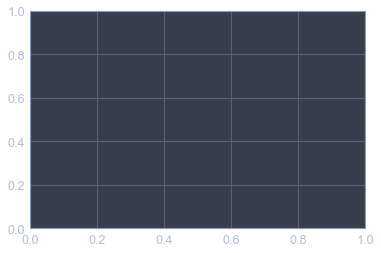

In [20]:
#  Time in min
plt.hist(data= "fordgo_master.csv", x= "duration_min");


##### Observation 1: Not surprisingly, the winter month andearly-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with November and September as the second most popular.

In [ ]:
# What's the distance in Km
plt.hist(data= df, x= "distance_Km");

##### Observation 2: Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

In [ ]:
# What's the start time month
plt.hist(data= df, x= "start_time_month");

##### Observation 3: The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters. 

In [53]:
df_cleaned.duration_min.describe()

count    447529.000000
mean         13.380483
std          42.092832
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max        1437.000000
Name: duration_min, dtype: float64

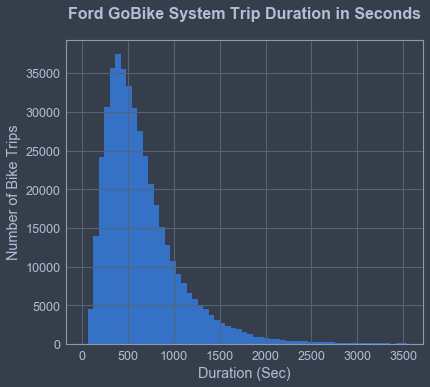

In [54]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df_cleaned, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

In [55]:
df_cleaned.duration_min.describe(percentiles = [.95])
df_cleaned.duration_min.describe()

count    447529.000000
mean         13.380483
std          42.092832
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max        1437.000000
Name: duration_min, dtype: float64

In [56]:
df_cleaned.duration_min.mean()

13.380482605596509

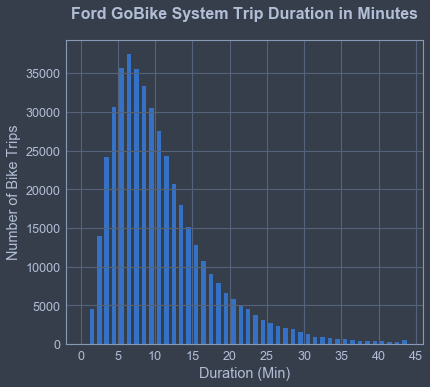

In [57]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

##### Observation 4: The average trip is just under 12.5 minutes, with 75% of trips being under 14 minutes. Looking at the histogram, most rides fall in between the 4 - 11 minute range. This suggests riders are taking the bikes short distances. 

In [58]:
df_cleaned.distance_miles.describe()

count    447529.000000
mean          0.994988
std           0.610997
min           0.000000
25%           0.572482
50%           0.875124
75%           1.287788
max          38.707487
Name: distance_miles, dtype: float64

In [59]:
df_cleaned.distance_miles.mean()

0.9949879455281748

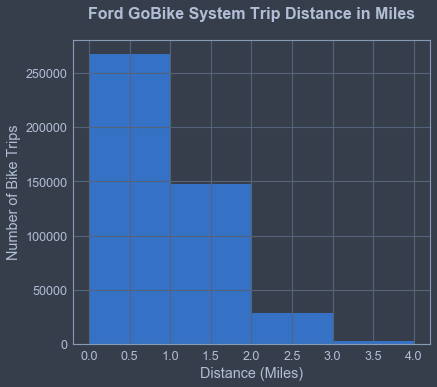

In [60]:
# Distance in miles traveled
bin_edges = np.arange(0, 5, 1)

plt.hist(data = df_cleaned, x = 'distance_miles', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

##### Observation 5: The mean distance traveled is 0.99 miles, with 75% of rides being 1.29 miles or less. Looking at the histogram above a majority of the rides fall under 2 miles, with over half of those 1 mile of less. 

In [61]:
df_cleaned.member_age.describe()

count    447529.000000
mean         38.143296
std           9.668300
min          20.000000
25%          31.000000
50%          36.000000
75%          44.000000
max          66.000000
Name: member_age, dtype: float64

In [62]:
df_cleaned.member_age.max()

66

In [63]:
df_cleaned.member_age.mean()

38.143295741728465

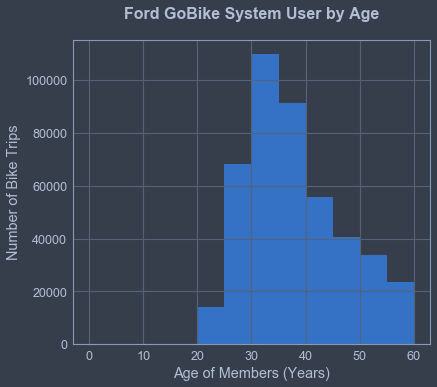

In [64]:
# Age group data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df_cleaned, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

##### Observation 6: The mean age of a user is 35.5 years old. As a reminder, in the cleaning portion of this data set all users under the age of 65 were removed. The histogram shows the majority of users fall between the ages of 25 - 40 years, which is also the same age range of working adults. 

In [65]:
# Usage by females, males, and other
gender = df_cleaned.member_gender.value_counts()
gender

Male      343418
Female     97895
Other       6216
Name: member_gender, dtype: int64

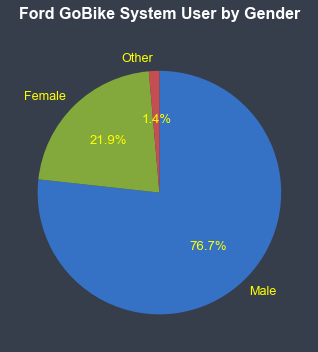

In [67]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'yellow'});
#plt.axis('square');
plt.title('Ford GoBike System User by Gender', y=1.05, fontsize=16, fontweight='bold', color = 'White');

##### Observation 7: The visual above demonstrates the overwhelming majority of users of the bike share system are male, representing 76.7% of the total users. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thankfully, due to thorough cleaning efforts there were no big surprises during the exploratory and visualization phase. The duration of the bike ride and the distance gave me a little trouble since there were some outliers I didn't anticipate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes. 

----------------

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the
data.

In [68]:
# Customers vs Subscribers
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

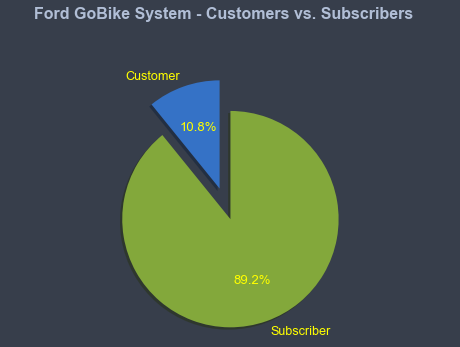

In [70]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'yellow'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

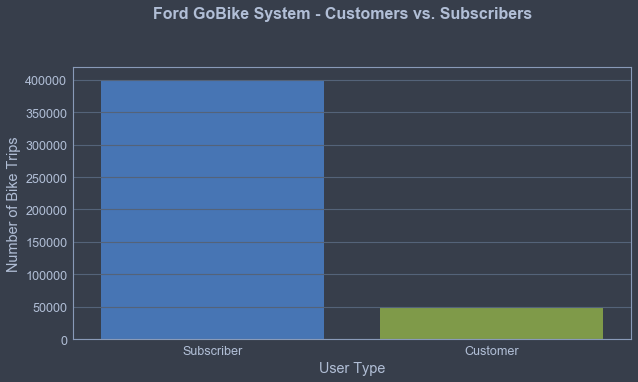

In [71]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_cleaned, x = "user_type", order = df_cleaned.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


##### Observation 1: The majority of users for the Ford Go Bike System are Subscribers i.e. customers who subscribe to the monthly membership. Customers pay by trip which is $2 per trip.

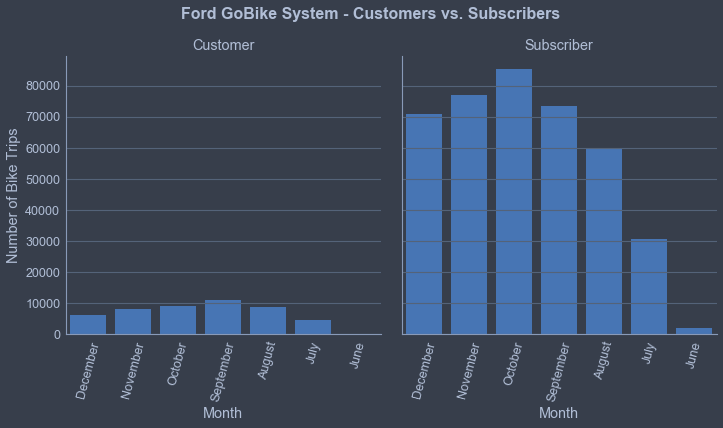

In [72]:
# Customer Usage by Month vs. Subscriber Usage by Month
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observation 2: Summer months are the worst for the bike sharing system for both groups. 
##### Customers: demand is high around wintertime, reaching its peak in September. 
##### Subscribers: the highest demand is from september till December, reaching it's peak in October. Subscribers are most likely riders using the bikes for their daily commute.

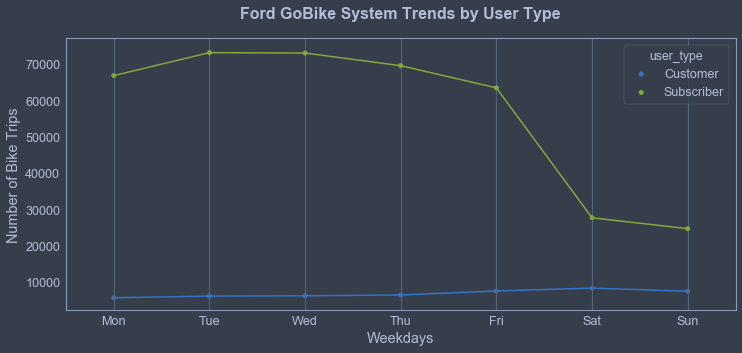

In [73]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

##### Observation 3: The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

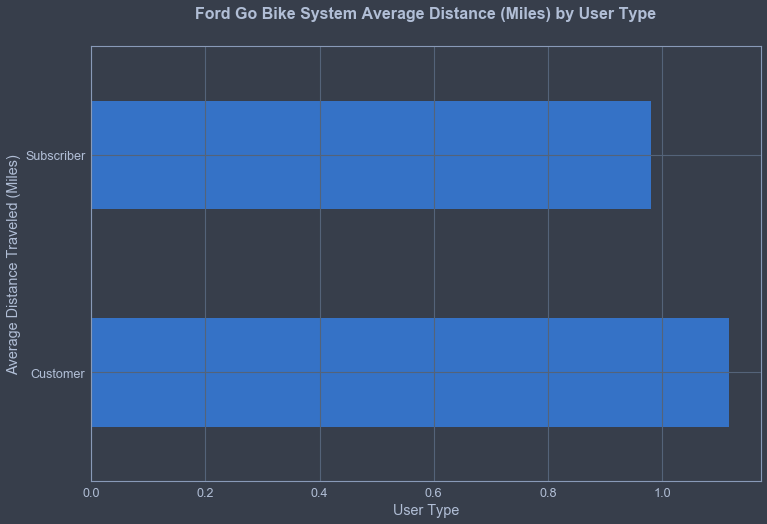

In [74]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = df_cleaned.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (Miles)');

##### Observation 4: The average distance traveled by customers is slightly higher than subscribers. Since the data exploration thus far suggests subscribers are using the bike share system for commuting purposes, that suggestion also implies that the commuting distance for the subscribers is less than the average ride a customer takes. 

In [75]:
df_cleaned.duration_min.describe(percentiles = [.95])

count    447529.000000
mean         13.380483
std          42.092832
min           1.000000
50%           9.000000
95%          26.000000
max        1437.000000
Name: duration_min, dtype: float64

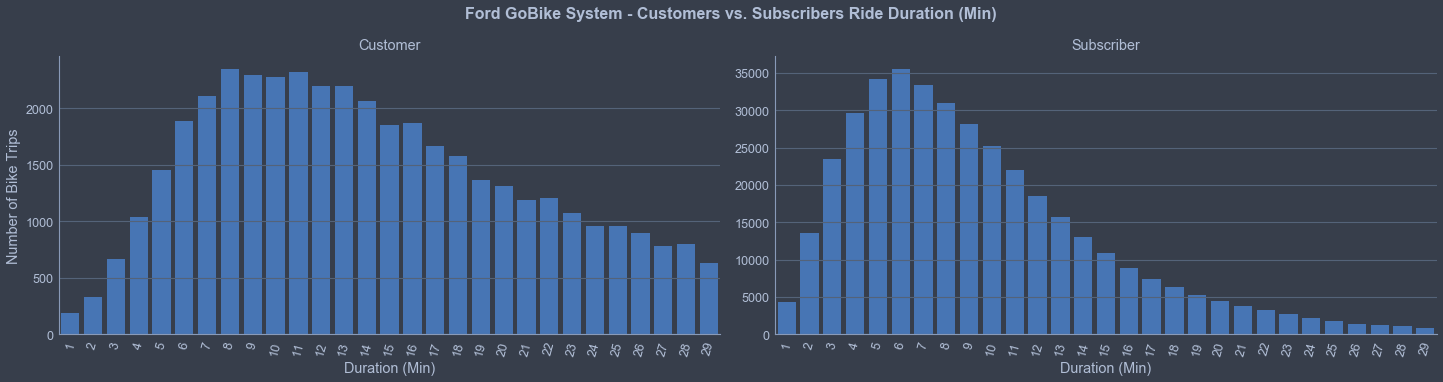

In [77]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_cleaned.query('duration_min < 30')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

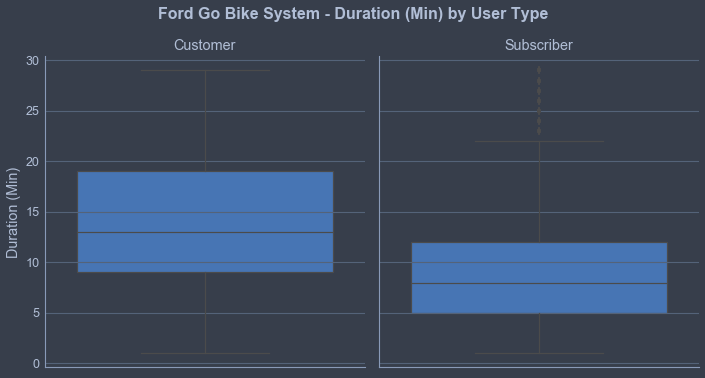

In [78]:
data = df_cleaned.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

##### Observation 5: The plots above show the ride duration spread in minutes (note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

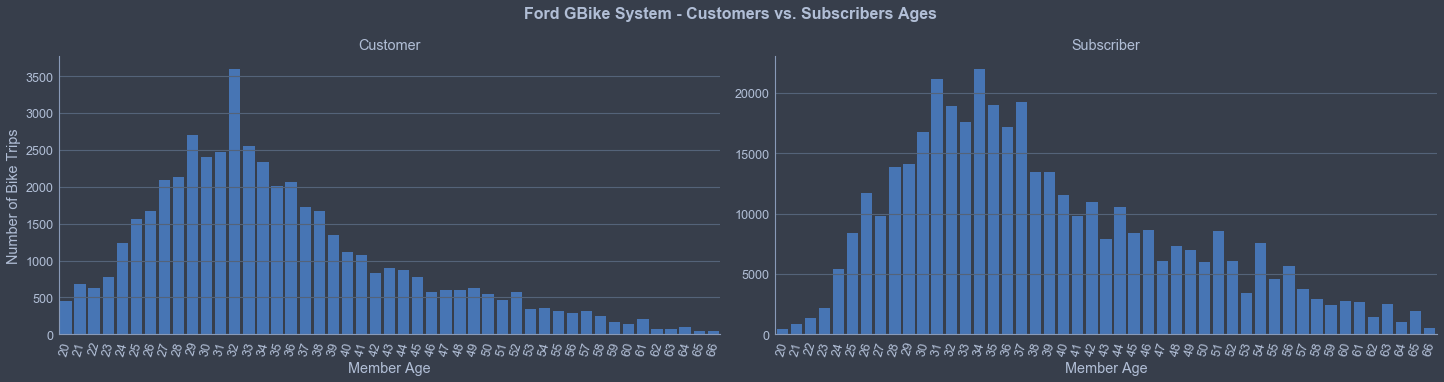

In [79]:
# # Customer vs. Subscriber Usage by Age
graph = sb.catplot(data = df_cleaned, x = 'member_age', col='user_type', kind='count', sharey = False, color = no_color, height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GBike System - Customers vs. Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observation 6: (Note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). Both user type graphs show the high number of 31 year olds falling withing both catgoires. Subscribers have a wider range of ages while Customers tends to have mostly younger users. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

----------------

<a id='multivariate'></a>
## Multivariate Exploration

> I created plots of three or more variables to investigate the Ford Go Bike data even further.

In [80]:
df_cleaned.member_age.describe()

count    447529.000000
mean         38.143296
std           9.668300
min          20.000000
25%          31.000000
50%          36.000000
75%          44.000000
max          66.000000
Name: member_age, dtype: float64

In [81]:
df_cleaned['age_bins'] = df_cleaned['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 66' if 55<x<=66
                                                       else x)
df_cleaned.age_bins.value_counts()

C:\Users\moly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


26 - 35    189005
36 - 45    134980
46 - 55     70235
56 - 66     29384
15 - 25     23925
Name: age_bins, dtype: int64

In [82]:
subscriber_age_df = df_cleaned[df_cleaned['user_type'] == 'Subscriber'].groupby(['start_time_month', 'age_bins']).agg({'bike_id':'count'}).reset_index()
#subscriber_age_df

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

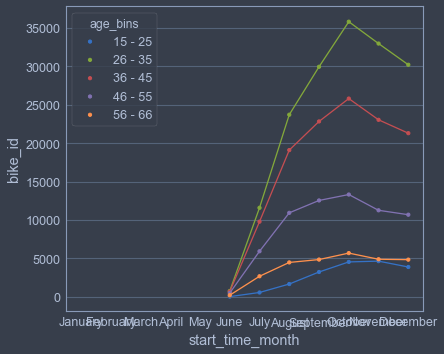

In [83]:
# Comparing monthly number of bike trips per subscribers, based on their age group (reference age bins I calculated above)
#plt.figure(figsize = (15,8))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax = sb.pointplot(data = subscriber_age_df, x='start_time_month', y='bike_id', hue='age_bins', scale=.6, order = months, height=5, aspect=2);

plt.xlabel('Month', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Ford GoBike System - Monthly Bike Trips Per Subscribers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');
plt.set_xticklabels(rotation=75);

# Legend
leg = ax.legend()
leg.set_title('Member by Age Group', prop={'size': 16})

plt.show()

##### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook. 

##### Observation 1: Subscribers who fall in the age group between 26-35 years old are the most common age group to use the bike sharing system. The 26-35 years old also lead the spike which occurs across all age groups in October. Subscribers who fall in the 36-45 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend at the 26-35 year olds. The youngest age group, the 15-25 years olds starts off with very few rides (comparative to the entire dataset), but generally increase throughout the year when they reach their first spike in July, with a slight dip during August and September, with another spike in October before decreasing again for the rest of the year. This follows the traditional school year, with the summer months of June - September designated as a break from school. 

TypeError: 'Text' object is not callable

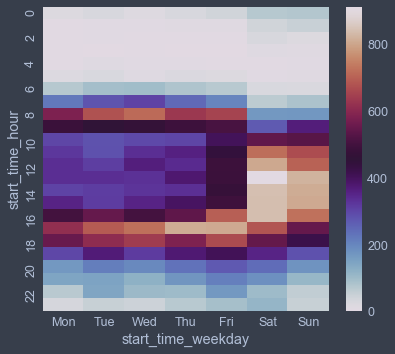

In [84]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

#graph.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

##### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook. 

TypeError: 'Text' object is not callable

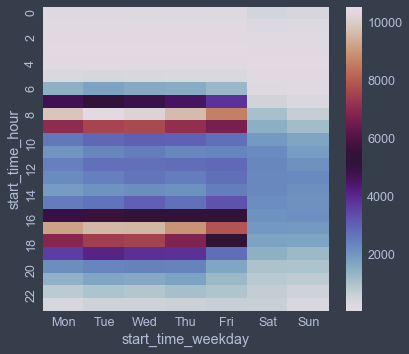

In [85]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

##### Please reference the slide deck with the correct visual - after much trial and error I can not get the code to work properly in this notebook. 

##### Observation 2: Customers use the bike sharing system more often on weekends, whilte Subscribers primarily use the bikes on weekdays. 
##### Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.
##### Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

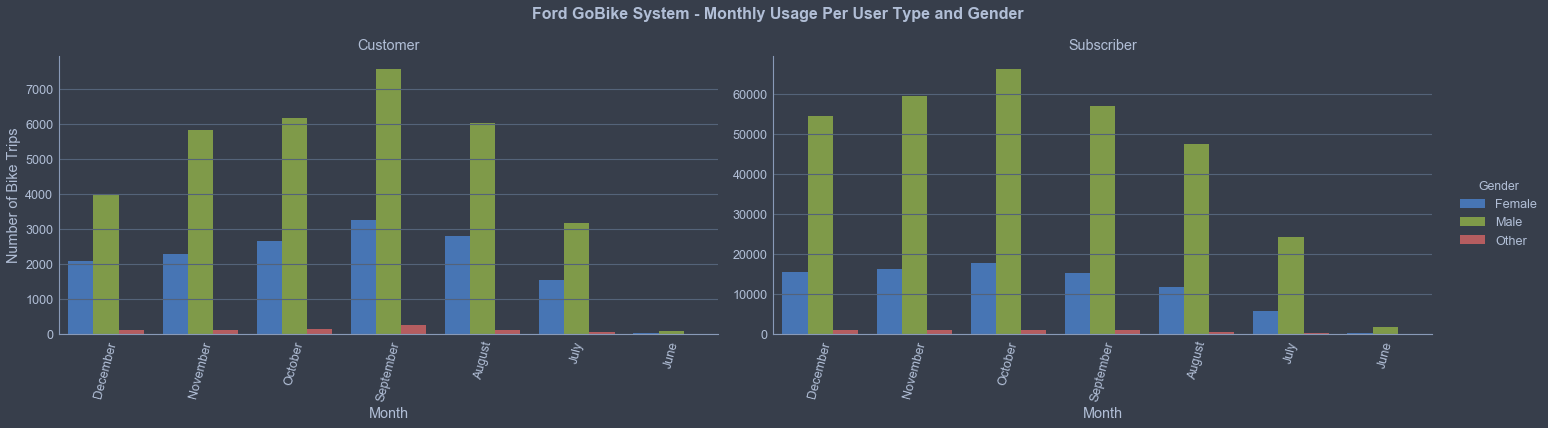

In [86]:
# Monthly usage - user type and gender
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - Monthly Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observation 3:  (Note the y-axis isn't shared between the Customer and Subscriber graphs in order to visualize trends easier). The trend for males and females is very similar for customers, the highest demand is around summertime, reaching its peak in July. For subscribers, the highest demand is from May until October, reaching it's peak in October. Suprisingly, there is a significant number of female Customers using the system between January and March, coming close to the numbers of to male Customers - the ratio is much smaller for the rest of the year.

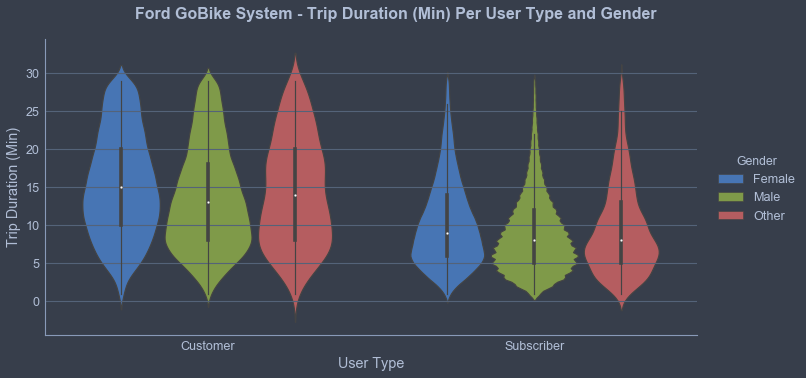

In [87]:
# Violinplot - duration (min) per user type and gender

graph = sb.catplot(data=data, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

##### Observation 4: In both cases, females take longer trips (measured in time) than males and other genders. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section essentially amplified the previous data topics of exploration through different visuals and adding in more variables to compare to other variables. Subscriber vs Customer age was expanded upon through the use of age groups, and a pointplot to demonstrate the varing habits of each age group. The heatmap didn't reveal anything new for the time based discussion on when and what time each user group uses the bike sharing system. As previously noted, Customers use the system at almost the opposite time as the Subscribers. 

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here. It was interesting to note the sharp monthly difference for males vs. females vs. other, and how close the female count got to the male Customer count in January through March. This may be a potential loss of possible Customers converting to Subscribers. 

In [90]:
from IPython.display import FileLink, FileLinks
FileLinks('fordgo_master')

Path ( fordgo_master ) doesn't exist. It may still be in the process of being generated, or you may have the incorrect path.

------------------

<a id='summary'></a>
## Summary

This project is a win - win situation where a large number of people can benefit from this program:
- Environmentally friendly, budget friendly, and lifetsyle friendly. 
- Subscribers (i.e. daily commuters) benefit from a health commuting choice
- Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
- Affordable and convenient transportation for the people of all socioeconomic classes

Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

------------------

<a id='sources'></a>
## Sources

- [FordGoBike Data Set](https://www.fordgobike.com/)
- [Haversine formula](https://www.movable-type.co.uk/scripts/latlong.html) used to calculate distances using latitude and longitude
- [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) documentation
- [Matplotlib histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) documentation
- [IPython Display](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) documentation
- [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) documentation and [tutorial](https://likegeeks.com/seaborn-heatmap-tutorial/)